In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = "../data/raw/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print("shape:", df.shape)
display(df.head())

shape: (5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

bmi    201
dtype: int64

In [7]:
df["gender"].value_counts(dropna=False)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [8]:
df_clean = df.copy()

# remove the single "Other" row in gender
df_clean = df_clean[df_clean["gender"] != "Other"].copy()

df_clean["gender"].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [9]:
df_clean["ever_married"].value_counts(dropna=False)

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [10]:
df_clean["ever_married"] = df_clean["ever_married"].astype("category")
df_clean["ever_married"].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [11]:
df_clean["work_type"].value_counts(dropna=False)

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [12]:
df_clean["work_type"] = df_clean["work_type"].astype("category")
df_clean["work_type"].dtype

CategoricalDtype(categories=['Govt_job', 'Never_worked', 'Private', 'Self-employed',
                  'children'],
, ordered=False, categories_dtype=object)

In [13]:
df_clean["Residence_type"].value_counts(dropna=False)

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [14]:
df_clean["Residence_type"] = df_clean["Residence_type"].astype("category")
df_clean["Residence_type"].dtype

CategoricalDtype(categories=['Rural', 'Urban'], ordered=False, categories_dtype=object)

In [15]:
df_clean["smoking_status"].value_counts(dropna=False)

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [16]:
df_clean["smoking_status"] = df_clean["smoking_status"].astype("category")
df_clean["smoking_status"].dtype

CategoricalDtype(categories=['Unknown', 'formerly smoked', 'never smoked', 'smokes'], ordered=False, categories_dtype=object)

In [17]:
df_clean.isna().sum().sort_values(ascending=False)

bmi                  201
id                     0
age                    0
gender                 0
hypertension           0
heart_disease          0
work_type              0
ever_married           0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

In [18]:
bmi_median = df_clean["bmi"].median()
print("BMI median:", bmi_median)

df_clean["bmi"] = df_clean["bmi"].fillna(bmi_median)

print("Missing BMI after fill:", df_clean["bmi"].isna().sum())

BMI median: 28.1
Missing BMI after fill: 0


In [19]:
df_clean.to_csv("../data/processed/stroke_clean_v1.csv", index=False)
print("Saved: data/processed/stroke_clean_v1.csv")

Saved: data/processed/stroke_clean_v1.csv


In [20]:
df_model = df_clean.drop(columns=["id"])

In [23]:
num_cols = ["age", "avg_glucose_level", "bmi"]

df_clean[num_cols + ["stroke"]].corr(numeric_only=True)["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.245239
avg_glucose_level    0.131991
bmi                  0.036075
Name: stroke, dtype: float64

In [24]:
df_clean.groupby("stroke")[["age","avg_glucose_level","bmi"]].mean()

,age,avg_glucose_level,bmi
stroke,,,
0,41.974831,104.787584,28.800432
1,67.728193,132.544739,30.090361


In [25]:
df_clean.groupby("stroke")[["age","avg_glucose_level","bmi"]].median()

,age,avg_glucose_level,bmi
stroke,,,
0,43.0,91.465,28.1
1,71.0,105.220,28.1


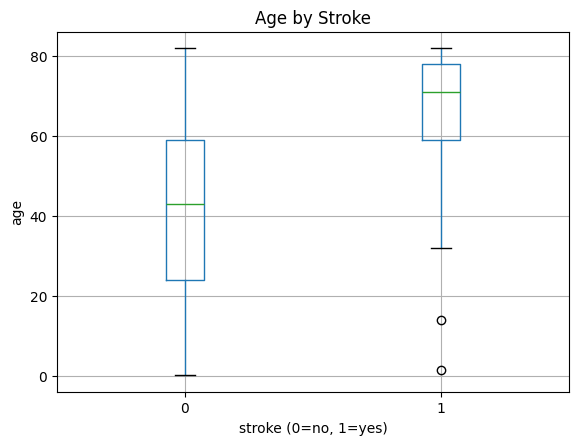

In [26]:
df_clean.boxplot(column="age", by="stroke")
plt.title("Age by Stroke")
plt.suptitle("")
plt.xlabel("stroke (0=no, 1=yes)")
plt.ylabel("age")
plt.show()

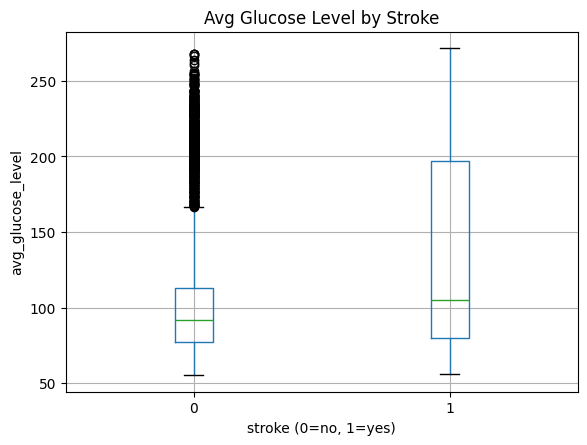

In [27]:
df_clean.boxplot(column="avg_glucose_level", by="stroke")
plt.title("Avg Glucose Level by Stroke")
plt.suptitle("")
plt.xlabel("stroke (0=no, 1=yes)")
plt.ylabel("avg_glucose_level")
plt.show()

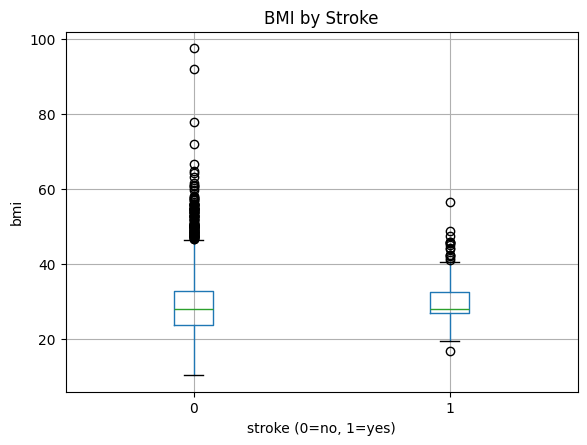

In [28]:
df_clean.boxplot(column="bmi", by="stroke")
plt.title("BMI by Stroke")
plt.suptitle("")
plt.xlabel("stroke (0=no, 1=yes)")
plt.ylabel("bmi")
plt.show()

In [29]:
pd.crosstab(df_clean["hypertension"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
hypertension,,
0,96.031230,3.968770
1,86.746988,13.253012


In [30]:
pd.crosstab(df_clean["heart_disease"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
heart_disease,,
0,95.820401,4.179599
1,82.971014,17.028986


In [31]:
pd.crosstab(df_clean["gender"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
gender,,
Female,95.290581,4.709419
Male,94.893617,5.106383


In [32]:
pd.crosstab(df_clean["ever_married"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
ever_married,,
No,98.348519,1.651481
Yes,93.438712,6.561288


In [33]:
pd.crosstab(df_clean["Residence_type"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
Residence_type,,
Rural,95.463589,4.536411
Urban,94.799692,5.200308


In [34]:
pd.crosstab(df_clean["work_type"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
work_type,,
Govt_job,94.977169,5.022831
Never_worked,100.000000,0.000000
Private,94.904241,5.095759
Self-employed,92.063492,7.936508
children,99.708879,0.291121


In [35]:
pd.crosstab(df_clean["smoking_status"], df_clean["stroke"], normalize="index") * 100

stroke,0,1
smoking_status,,
Unknown,96.955959,3.044041
formerly smoked,92.081448,7.918552
never smoked,95.243129,4.756871
smokes,94.676806,5.323194
